> **`(!)`** 2021 Written by Giovanni Squillero <[squillero@polito.it](squillero@polito.it)>  
> This is free and unencumbered software released into the public domain.

ARG Database: [https://mivia.unisa.it/datasets/graph-database/arg-database/documentation/](https://mivia.unisa.it/datasets/graph-database/arg-database/documentation/)

In [51]:
import struct
import logging

logging.basicConfig(format='[%(asctime)s] %(levelname)s: %(message)s', datefmt='%H:%M:%S')
logging.getLogger().setLevel(level=logging.INFO)

import networkx as nx
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [21, 9]

In [52]:
with open('graphs/iso_m2D_m196.A00', 'rb') as input:
    raw_data = input.read()
cooked_data = [struct.unpack('<h', raw_data[i:i+2])[0] for i in range(0, len(raw_data), 2)]

In [53]:
graph = nx.DiGraph()

num_nodes = cooked_data.pop(0)
logging.debug(f"Graph has {num_nodes:,} nodes")

for node in range(num_nodes):
    graph.add_node(node)

for node in range(num_nodes):
    num_edges = cooked_data.pop(0)
    logging.debug(f"Node {node} has {num_edges} edges")
    for edge in range(num_edges):
        target = cooked_data.pop(0)
        label = None    # or label = cooked_data.pop(0)
        graph.add_edge(node, target, label=label)
        logging.debug(f"    {node} =[{label}]=> {target}")

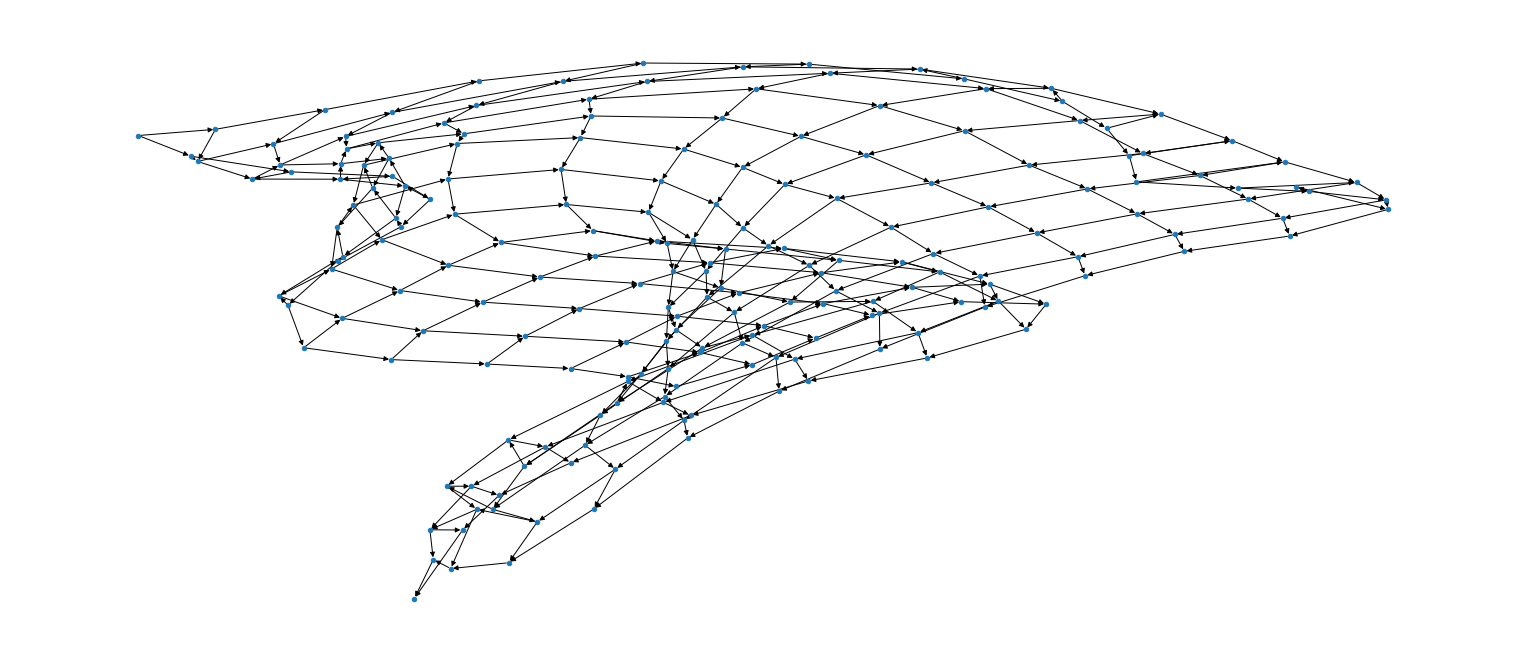

In [54]:
nx.draw(graph, node_size=20)